# 8. Batch Slurry Adsorption

In this notes we will use an example problem to introduce material balances in slurry adsorption processes. We will consider a Batch, process configuration and then its extension to a continuous process configuration.

## 8.1 Problem Statement

A water purification process is carried out via batch adsorption. The initial concentration of the pollutant is 0.1 $[mol\,l^{-1}]$, and it needs to be lowered by at least an order of magnitude. The process is carried out in batches characterised by a water volume $V_{\ell}$ of 2 $m^3$, in which $100\,kg$ of adsorbent are dispersed to form a slurry.  The pollutant adsorption on the surface of the stationary phase particles is well described by a linear isotherm $q=Hc^*$ with $H=1\times{10^{-1}}$.  The liquid-side mass transfer coefficient is $k_{\ell}=1\times{10^{-5}}\,[m s^{-1}]$.

- Is it possible to carry out the requested purification with the operation parameters described in the problem statment? 
- If this is the case how much time does it take to lower the pollutant concetration to the target specification? 


## 8.2 Material Balance in a Batch Slurry adsorption process

Let us begin by writing the material balance for a batch membrane separator.

Since we have a batch system, no inlet or outlet streams are present and we can write: 

$$
V_\ell{c_0}=V_\ell{c}+S_pq
\label{eq:matbalance}{\tag{1}}
$$(eq1)

Where $V_{\ell}$ is the volume of the liquid phase (it can be considered constant), $c_0$ is the initial concentration of coloring agent in solution, $c$ is the instantaneous concentration of coloring agent in solution,  $q$ the instantaneous concentration of coloring agent adsorbed on the stationary phase and $S_p$ the mass of the adsorbent particles.

Mass transfer in these cases is dominated by bulk transport on the liquid side, thus the flux $J$ of the pollutant leaving the fluid phase to be incorporated in the stationary phase can be written as: 

$$
J=-k_\ell(c-c^*)
$$(eq2)

where $k_\ell$ is the mass transfer coefficient on the liquid side, and $c^*$ is the equilibrium concentration, reached at the solid/liquid interface. $J$ has the units of number of moles per unit time per unit surface. 

The differential material balance on the solute concentration can thus be written as: 

$$
\frac{dc}{dt}=-k_\ell\frac{S_p}{V_\ell}(c-c^*)=-k_\ell{a}(c-c^*)
$$(eq3)

Where $a$ represents the particles mass per unit of fluid volume. 


The equilibrium of the adsorption process is well captured by a linear isotherm: 

$$
c^*=\frac{q}{H}
\label{eq:equilibrium}
$$(eq4)

Using Eq. {eq}`eq1` and {eq}`eq4`, Eq. {eq}`eq2` can be rewritten as:

$$
\frac{dc}{dt}=-k_\ell{a}\left(c-\frac{q}{H}\right) = 
$$

$$
=-k_\ell{a}\left(c-\frac{(c_0-c)V_\ell}{HS_p}\right) = 
$$

$$
=-k_\ell{a}c\left(1+\frac{V_\ell}{HS_p}\right)+k_\ell{a}c_0\frac{V_\ell}{HS_p}= 
$$(eq5)

Defining: $\beta=\left(1+\frac{V_\ell}{HS_p}\right)$, and $\alpha=\frac{V_\ell}{HS_p}$, one gets: 

$$
\frac{dc}{dt}+k_\ell{a}\beta\,c=k_\ell{a}c_0\alpha
$$(eq6)

which is a first order, non homogeneous ODE in the form $y^\prime+C_1y=C_2$ with constant a and b coefficients. 

To solve our problem Eq. \ref{eq:ODE} can be solved either numerically or analytically. 
In this case the analytical solution can be obtained from the general solution for ODEs of this type: 

$$
y(t)=e^{-A(t)}\left[k_1+\int{be^{A(t)}dt}\right]
$$(eq7)

where $A(t)=\int{C_1dt}$

In our case: 
- $C_1=k_\ell{a\beta}$, thus $A(t)=k_\ell{a\beta}\,t$
- $C_2=k_\ell{a\alpha}c_0$, 

thus: 

$$
\int{be^{A(t)}dt}=\int{k_\ell{a\alpha}e^{k_\ell{a\beta}\,t}dt}=\frac{k_\ell{a\alpha}c_0}{k_\ell{a\beta}}e^{k_\ell{a\beta}\,t}=\frac{\alpha{c_0}}{\beta}e^{k_\ell{a\beta}\,t}
$$(eq8)

putting everything together: 

$$
c(t)=k_1e^{-k_\ell{a\beta}\,t}+\frac{\alpha{c_0}}{\beta}
$$(eq9)

The constant $C_1$ can be computed from the initial conditions: at $t=0$ $c(t)=c_0$, therefore: 

$$
k_1=c_0\left(1-\frac{\alpha}{\beta}\right)=\frac{c_0}{\beta}
$$(eq10)

The final solution for the time-dependent concentration profile $c(t)$ is: 

$$
c(t)=\frac{c_0}{\beta}\left(e^{-k_\ell{a\beta}\,t}+\alpha\right)
$$(eq11)

The performance of a batch slurry process in removing the concentration in the fluid phase is limited, i.e. the concentration has an asymptotic behavior in time $\lim_{t\to\infty} c(t) = \frac{\alpha{c_0}}{\beta}$.


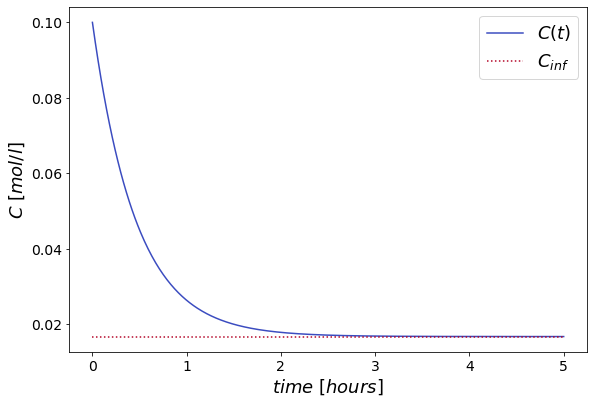

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm

#Plotting
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.2,1.2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Data
Vl= 2
H=0.1
Sp= 100
C0=0.1
a = Sp / Vl
kl = 1E-5 * 3600
alpha= Vl/H/Sp
beta = 1+Vl/H/Sp
N = 500 #number of points
time = np.linspace(0,5, N)
C_inf= np.ones(np.size(time)) * C0*alpha/beta

color=iter(cm.coolwarm(np.linspace(0,1,2)))
c=next(color)
C = C0/beta * (np.exp(-kl*a*beta*time)+alpha) 
axes.plot(time,C, marker=' ',c=c)
c=next(color)
axes.plot(time,C_inf,marker=' ',linestyle='dotted',c=c)
    
plt.title('', fontsize=18);
axes.set_xlabel('$time\,\,[hours]$', fontsize=18);
axes.set_ylabel('$C\,\,[mol / l]$',fontsize=18);
axes.legend(['$C(t)$','$C_{inf}$'], fontsize=18);

## 8.3 Continuous Slurry Adsorption

The slurry adsorption process can be carried out in a continuous mode. In this mode both the adsorbent and the fluid phase are continuously fed into and removed from a stirred tank. 

In this context the  differential material balance on the solute concentration used to solve the unsteady state batch process should be rewritten as: 

$$
\frac{dc}{dt}=-k_\ell{a}(c-c^*) \rightarrow \frac{{c_{in}-c_{out}}}{\tau}=k_\ell{a}(c_{out}-c^*)
$$(eq12)

where $\tau$ is the residence time, $c_{out}$ the concentration in the liquid phase in the unit, $c_{in}$ the concentration in the feed, and $a$ the amount of surface of the stationary phase particles per unit volume of the liquid phase. 

Note that in a continuous process it is convenient to define $a$ as follows: 

$$
a={S}/Q
$$(eq13)

where $Q$ is the volumetric flowrate of the liquid phase, ans $S$ is the mass flowrate of the solid phase. 

This expression needs to be solved together with the adsorption isotherm $q=kc^*$, where $q$ is the amount adsorbed per kg of stationary phase, c is the molar concentration in solution and $k$ is the partition coefficient, and with the global material balance at steady state, which reads: 

$$
c_{in}Q=qS+c_{out}Q
$$(eq14)